In [ ]:
# prerequirement : install imblearn and graphiz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Wine.csv', names = ['class','Alcohol','MalicAcid','Ash','AshAlcalinity','Magnesium','Phenol',
                                      'Flavanoid','NonFlavanoid','Proanthocyanins','ColorIntensity',
                                      'Hue','DilutedWines','Proline'])

In [3]:
df.head()

,class,Alcohol,MalicAcid,Ash,AshAlcalinity,Magnesium,Phenol,Flavanoid,NonFlavanoid,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.describe()

,class,Alcohol,MalicAcid,Ash,AshAlcalinity,Magnesium,Phenol,Flavanoid,NonFlavanoid,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class              178 non-null int64
Alcohol            178 non-null float64
MalicAcid          178 non-null float64
Ash                178 non-null float64
AshAlcalinity      178 non-null float64
Magnesium          178 non-null int64
Phenol             178 non-null float64
Flavanoid          178 non-null float64
NonFlavanoid       178 non-null float64
Proanthocyanins    178 non-null float64
ColorIntensity     178 non-null float64
Hue                178 non-null float64
DilutedWines       178 non-null float64
Proline            178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
print(df.groupby('class').size())

class
1    59
2    71
3    48
dtype: int64


In [7]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(df.drop('class', axis=1), df['class'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.columns = df.columns

In [8]:
oversampled_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 14 columns):
class              213 non-null int64
Alcohol            213 non-null float64
MalicAcid          213 non-null float64
Ash                213 non-null float64
AshAlcalinity      213 non-null float64
Magnesium          213 non-null float64
Phenol             213 non-null float64
Flavanoid          213 non-null float64
NonFlavanoid       213 non-null float64
Proanthocyanins    213 non-null float64
ColorIntensity     213 non-null float64
Hue                213 non-null float64
DilutedWines       213 non-null float64
Proline            213 non-null float64
dtypes: float64(13), int64(1)
memory usage: 23.4 KB


In [9]:
print(oversampled_train.groupby('class').size())

class
1    71
2    71
3    71
dtype: int64


In [10]:
def importdata():
    df = oversampled_train
    return df

In [11]:
def splitdataset(df):
    
    # Seperating the target variable
    X = df.values[:,1:]  
    y = df.values[:,0] 

    #Split data into training and test datasets (training will be based on 70% of data)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify =y)
    
    # transform data so its distribution will have a mean value 0 and standard deviation of 1
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    #test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
    print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))
    
    return X, y, X_train, X_test, y_train, y_test 

In [12]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree

In [13]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    #clf_gini = DecisionTreeClassifier(criterion = "gini", 
    #        random_state = 100,max_depth=8, min_samples_leaf=3)
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

In [14]:
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

In [15]:
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    return y_pred

In [16]:
# Function to show prediction values
def pred_result (df,y_test,y_pred_clf):

    df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_clf})
    df_new['result'] = np.where(df_new['Actual'] == df_new['Predicted'], 'correct', 'wrong')
    print(df_new)


In [17]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: \n", 
    confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : \n", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : \n", 
    classification_report(y_test, y_pred)) 

In [18]:
# Function to draw decision tree
def draw_dt (df,clf_object):
    
    graph = Source(tree.export_graphviz(clf_object, out_file=None
                                        , feature_names= df.iloc[:, 1:].columns, class_names=['1', '2', '3'] 
                                        , filled = True))
    display(SVG(graph.pipe(format='svg')))
    
    

In [19]:
# Driver code 
def main(): 
      
    # Building Phase 
    data = importdata() 
    X, y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase 
    print("\n\033[1m"+"Results Using Gini Index:"+"\033[0;0m") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini)
    
    #Prediction result
    pred_result(data,y_test,y_pred_gini)
    
     # Draw tree
    draw_dt (data,clf_gini)
    
    print("\n\n\033[1m" + "Results Using Entropy:"+"\033[0;0m") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy)
    
    #Prediction result
    pred_result(data,y_test,y_pred_entropy)
    
     # Draw tree
    draw_dt (data,clf_entropy)

There are 149 samples in the training set and 64 samples in the test set

Results Using Gini Index:
Confusion Matrix: 
 [[19  3  0]
 [ 2 19  0]
 [ 0  1 20]]
Accuracy : 
 90.625
Report : 
               precision    recall  f1-score   support

         1.0       0.90      0.86      0.88        22
         2.0       0.83      0.90      0.86        21
         3.0       1.00      0.95      0.98        21

    accuracy                           0.91        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.91      0.91      0.91        64

    Actual  Predicted   result
0      1.0        1.0  correct
1      2.0        2.0  correct
2      1.0        1.0  correct
3      1.0        1.0  correct
4      1.0        1.0  correct
5      1.0        1.0  correct
6      3.0        3.0  correct
7      3.0        3.0  correct
8      3.0        3.0  correct
9      2.0        2.0  correct
10     2.0        2.0  correct
11     3.0        3.0  correct
12     3.0        3.0  corre

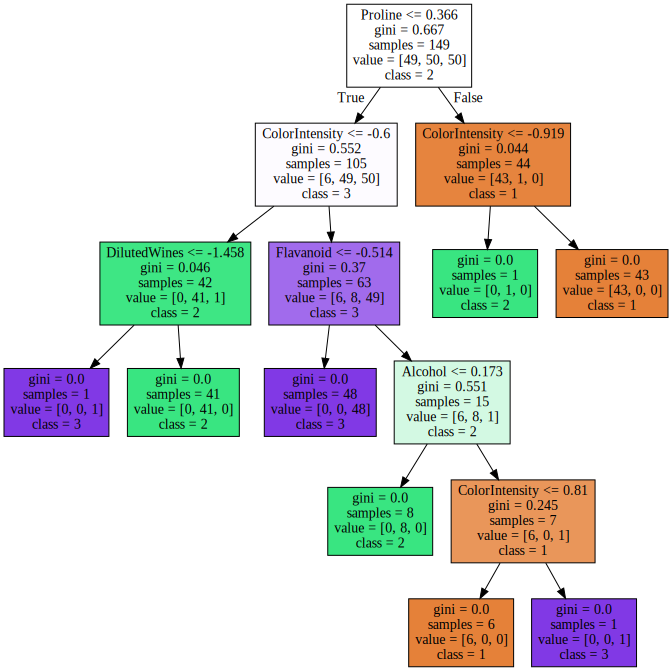



Results Using Entropy:
Confusion Matrix: 
 [[19  3  0]
 [ 3 18  0]
 [ 0  0 21]]
Accuracy : 
 90.625
Report : 
               precision    recall  f1-score   support

         1.0       0.86      0.86      0.86        22
         2.0       0.86      0.86      0.86        21
         3.0       1.00      1.00      1.00        21

    accuracy                           0.91        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.91      0.91      0.91        64

    Actual  Predicted   result
0      1.0        1.0  correct
1      2.0        2.0  correct
2      1.0        1.0  correct
3      1.0        1.0  correct
4      1.0        1.0  correct
5      1.0        2.0    wrong
6      3.0        3.0  correct
7      3.0        3.0  correct
8      3.0        3.0  correct
9      2.0        1.0    wrong
10     2.0        1.0    wrong
11     3.0        3.0  correct
12     3.0        3.0  correct
13     2.0        2.0  correct
14     3.0        3.0  correct
15     1.0

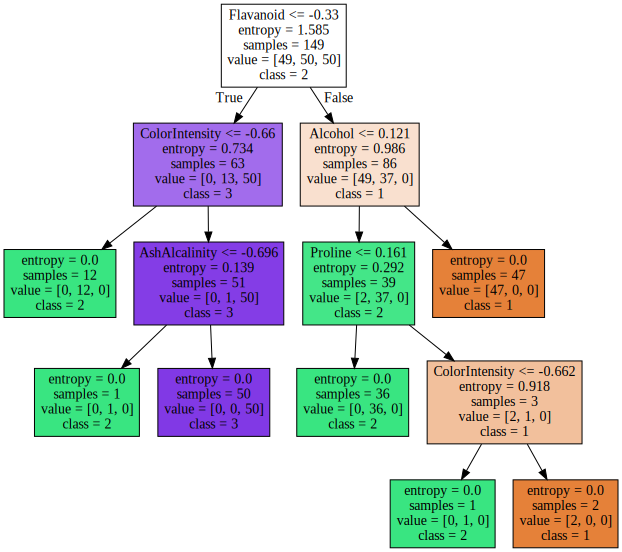

In [20]:
# Calling main function 
if __name__=="__main__": 
    main() 